In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [295]:
df = pd.read_csv('project_1.csv')
df.head()

,time,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon
0,2006-01-02 00:00:00,282.77585,41.925180,25.926952,4.663135e-09,4.781004e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5
1,2006-01-03 00:00:00,284.47113,8.905806,10.946910,8.046593e-08,1.295726e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5
2,2006-01-04 00:00:00,284.28796,16.511415,6.405902,2.910936e-09,4.094447e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5
3,2006-01-05 00:00:00,282.12110,29.948362,9.315041,7.432505e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5
4,2006-01-06 00:00:00,280.89090,19.064156,7.941241,6.894238e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5


In [296]:
df.shape

(27374, 12)

12 columns, 27374 rows

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        27374 non-null  object 
 1   TREFMXAV_U  27374 non-null  float64
 2   FLNS        27374 non-null  float64
 3   FSNS        27374 non-null  float64
 4   PRECT       27374 non-null  float64
 5   PRSN        27374 non-null  float64
 6   QBOT        27374 non-null  float64
 7   TREFHT      27374 non-null  float64
 8   UBOT        27374 non-null  float64
 9   VBOT        27374 non-null  float64
 10  lat         27374 non-null  float64
 11  lon         27374 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.5+ MB


No missing data

In [298]:
df.describe()

,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon
count,27374.000000,27374.000000,27374.000000,2.737400e+04,2.737400e+04,27374.000000,27374.000000,27374.000000,27374.000000,2.737400e+04,27374.0
mean,288.836179,42.995679,97.026261,3.379697e-08,3.049825e-10,0.006523,284.876413,1.176320,1.503084,5.324608e+01,357.5
std,5.246468,21.451927,75.062880,4.986518e-08,4.706017e-09,0.002126,4.992277,3.066843,2.940138,1.659148e-11,0.0
min,274.153200,0.611385,2.819259,-4.671764e-28,-6.256338e-21,0.001855,268.938400,-9.739025,-8.991429,5.324607e+01,357.5
25%,284.719465,26.157544,31.037187,2.131118e-09,0.000000e+00,0.004860,280.987885,-1.085982,-0.766405,5.324607e+01,357.5
50%,288.299895,40.777005,78.443183,1.311730e-08,1.206375e-21,0.006211,284.537575,1.488009,1.593354,5.324607e+01,357.5
75%,292.869525,57.113572,149.332133,4.637272e-08,2.348279e-16,0.007947,288.900110,3.390555,3.634500,5.324607e+01,357.5
max,311.257260,111.851400,310.191700,7.752961e-07,2.332090e-07,0.015222,303.117980,10.234506,11.178102,5.324607e+01,357.5


In [299]:
df['time'] = pd.to_datetime(df['time'])

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        27374 non-null  datetime64[ns]
 1   TREFMXAV_U  27374 non-null  float64       
 2   FLNS        27374 non-null  float64       
 3   FSNS        27374 non-null  float64       
 4   PRECT       27374 non-null  float64       
 5   PRSN        27374 non-null  float64       
 6   QBOT        27374 non-null  float64       
 7   TREFHT      27374 non-null  float64       
 8   UBOT        27374 non-null  float64       
 9   VBOT        27374 non-null  float64       
 10  lat         27374 non-null  float64       
 11  lon         27374 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 2.5 MB


In [301]:
print(f"Number of unique latitudes: {df['lat'].nunique()}")
print(f"Number of unique longitudes: {df['lon'].nunique()}")

Number of unique latitudes: 1
Number of unique longitudes: 1


All measurements are taken at a single location - drop and keep in metadata only

In [302]:
cols_to_drop = ['lat', 'lon']

df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        27374 non-null  datetime64[ns]
 1   TREFMXAV_U  27374 non-null  float64       
 2   FLNS        27374 non-null  float64       
 3   FSNS        27374 non-null  float64       
 4   PRECT       27374 non-null  float64       
 5   PRSN        27374 non-null  float64       
 6   QBOT        27374 non-null  float64       
 7   TREFHT      27374 non-null  float64       
 8   UBOT        27374 non-null  float64       
 9   VBOT        27374 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.1 MB


Give some geographical context to the location site

In [7]:
import folium

map = folium.Map(location=[53.246075,357.5], zoom_start=13)
folium.Marker([53.246075,357.5], popup='Measurement Site').add_to(map)
map

Find heading code meanings and store in dictionary

In [303]:
heading_meanings = {
    'TREFMXAV_U' : 'Urban daily maximum of average 2-m temperature / K',
    'FLNS' : 'Net longwave flux at surface / Wm^-2',
    'FSNS' : 'Net solar flux at surface / Wm^-2',
    'PRECT' : 'Total (convective and large-scale) precipitation rate (liq + ice) / ms^-1',
    'PRSN' : 'Currently unknown',
    'QBOT' : 'Lowest model level water vapor mixing ratio',
    'TREFHT' : 'Reference height temperature / K',
    'UBOT' : 'Lowest model level zonal wind / ms^-1',
    'VBOT' : 'Lowest model level meridional wind / ms^-1',
    'lat' : 'Latitude of measurement site / degrees = 53.246075',
    'lon' : 'Longitude of measurement site / degrees = 357.5'
}

Research suggests PRSN is snow precipitation i.e. snowfall (solid precipitation) flux/rate at the surface, expressed as liquid-water equivalent

To confirm:

- Bound check: 0 ≤ PRSN ≤ PRECT should hold almost everywhere
    - If true, then PRECT - PRSN is effectively the rain component
- Temperature check: PRSN should spike primarily when TREFHT is near/below 273.15 K (freezing)

In [304]:
# Bound check

no_cond_met = len(df[(df['PRSN'] >= 0) & (df['PRSN'] <= df['PRECT'])])
prop_cond_met = no_cond_met / df.shape[0]

print(f"{(prop_cond_met * 100):.2f}% of the data meets the bound check.")

96.17% of the data meets the bound check.


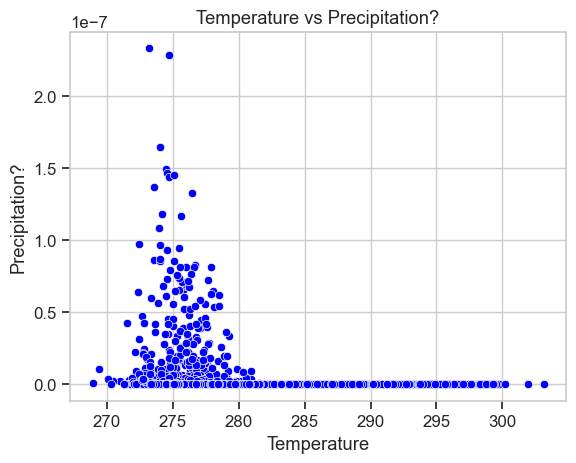

In [305]:
# Temp check

sns.scatterplot(x=df['TREFHT'], y=df['PRSN'], marker='o', color='blue')
plt.xlabel('Temperature')
plt.ylabel('Precipitation?')
plt.title('Temperature vs Precipitation?')
plt.savefig('temp_check.png', dpi=300, bbox_inches='tight')
plt.draw()
plt.show()

Clear spike around freezing point of water

Both checks passed

In [306]:
# Update metadata dictionary and make df

heading_meanings['PRSN'] = 'Snow precipitation (solid precipitation) flux/rate at the surface, expressed as liquid-water equivalent / ms^-1'

meta_df = pd.DataFrame({'Column': list(heading_meanings.keys()), 
                       'Meaning': list(heading_meanings.values())})
meta_df

,Column,Meaning
0,TREFMXAV_U,Urban daily maximum of average 2-m temperature...
1,FLNS,Net longwave flux at surface / Wm^-2
2,FSNS,Net solar flux at surface / Wm^-2
3,PRECT,Total (convective and large-scale) precipitati...
4,PRSN,Snow precipitation (solid precipitation) flux/...
5,QBOT,Lowest model level water vapor mixing ratio
6,TREFHT,Reference height temperature / K
7,UBOT,Lowest model level zonal wind / ms^-1
8,VBOT,Lowest model level meridional wind / ms^-1
9,lat,Latitude of measurement site / degrees = 53.24...


In [307]:
corr_matrix = df.corr()

print(corr_matrix)

                time  TREFMXAV_U      FLNS      FSNS     PRECT      PRSN  \
time        1.000000    0.188005  0.028905  0.063487 -0.017728 -0.031175   
TREFMXAV_U  0.188005    1.000000  0.219688  0.721310 -0.103835 -0.116976   
FLNS        0.028905    0.219688  1.000000  0.683627 -0.473853 -0.059749   
FSNS        0.063487    0.721310  0.683627  1.000000 -0.329469 -0.064145   
PRECT      -0.017728   -0.103835 -0.473853 -0.329469  1.000000  0.117777   
PRSN       -0.031175   -0.116976 -0.059749 -0.064145  0.117777  1.000000   
QBOT        0.157445    0.791619 -0.304497  0.251489  0.213600 -0.078040   
TREFHT      0.177089    0.967620  0.025457  0.605906 -0.026978 -0.123028   
UBOT        0.013412   -0.167388 -0.028396 -0.169522 -0.000641 -0.051850   
VBOT       -0.011024   -0.126361 -0.273296 -0.335963  0.252043 -0.037847   

                QBOT    TREFHT      UBOT      VBOT  
time        0.157445  0.177089  0.013412 -0.011024  
TREFMXAV_U  0.791619  0.967620 -0.167388 -0.126361  
FLNS

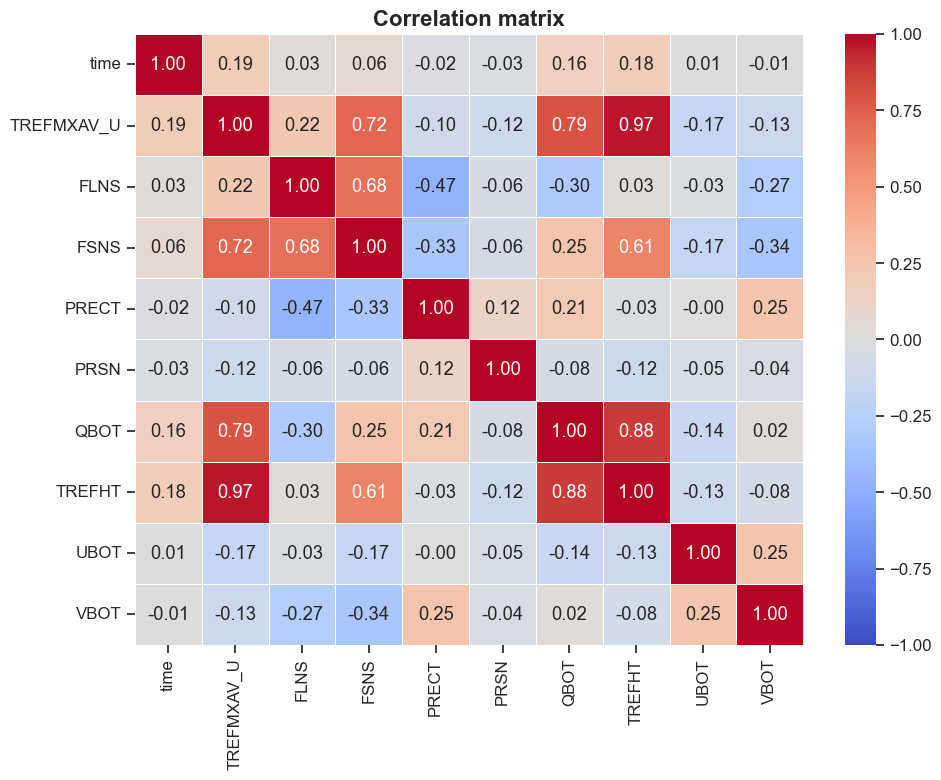

In [308]:
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            fmt='.2f', linewidths=0.5)

plt.title("Correlation matrix", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('corr_mat.png', dpi=300, bbox_inches='tight')
plt.draw()
plt.show()

In [309]:
print(df['time'].max())

2080-12-31 00:00:00


In [310]:
print(df['time'].min())

2006-01-02 00:00:00


Good opportunity to look at long term changes over the century

Check format of datetime data

In [311]:
df['time'] = pd.to_datetime(df['time'])
df.loc[(df['time'].dt.month==2) & (df['time'].dt.day==29), 'time'].head()

Series([], Name: time, dtype: datetime64[ns])

In [312]:
days_per_year = df.groupby(df['time'].dt.year).size()
days_per_year.value_counts().sort_index()

364     1
365    74
Name: count, dtype: int64

In [313]:
full = pd.date_range(df['time'].min().normalize(), df['time'].max().normalize(), freq='D')
missing = full.difference(df['time'])
missing[:30], len(missing)

(DatetimeIndex(['2008-02-29', '2012-02-29', '2016-02-29', '2020-02-29',
                '2024-02-29', '2028-02-29', '2032-02-29', '2036-02-29',
                '2040-02-29', '2044-02-29', '2048-02-29', '2052-02-29',
                '2056-02-29', '2060-02-29', '2064-02-29', '2068-02-29',
                '2072-02-29', '2076-02-29', '2080-02-29'],
               dtype='datetime64[ns]', freq=None),
 19)

Using 365 day calendar for all years (no leap years)

## What are the long-term trends in warming, urban heat amplification, and extreme weather events at this location?

### Long-term warming trends

In [314]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

df.drop(['time'], axis=1, inplace=True)

annual_df = df.copy().drop(['month', 'day'], axis=1).groupby('year').mean().reset_index()

annual_df.head()

,year,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT
0,2006,287.215171,41.931870,87.163589,3.341157e-08,3.174364e-10,0.006033,283.340474,0.896966,1.547436
1,2007,287.660296,43.446521,91.296121,3.464801e-08,1.388909e-10,0.006034,283.801151,1.797941,2.305364
2,2008,287.674791,42.721781,88.977344,3.836932e-08,1.619013e-11,0.006165,283.790595,1.132939,2.093794
3,2009,287.066897,40.063709,86.047715,3.419310e-08,7.733756e-10,0.006059,283.436362,0.031906,0.978087
4,2010,287.782010,45.446871,96.741252,3.425257e-08,3.618069e-10,0.006024,283.783431,0.794693,1.438022


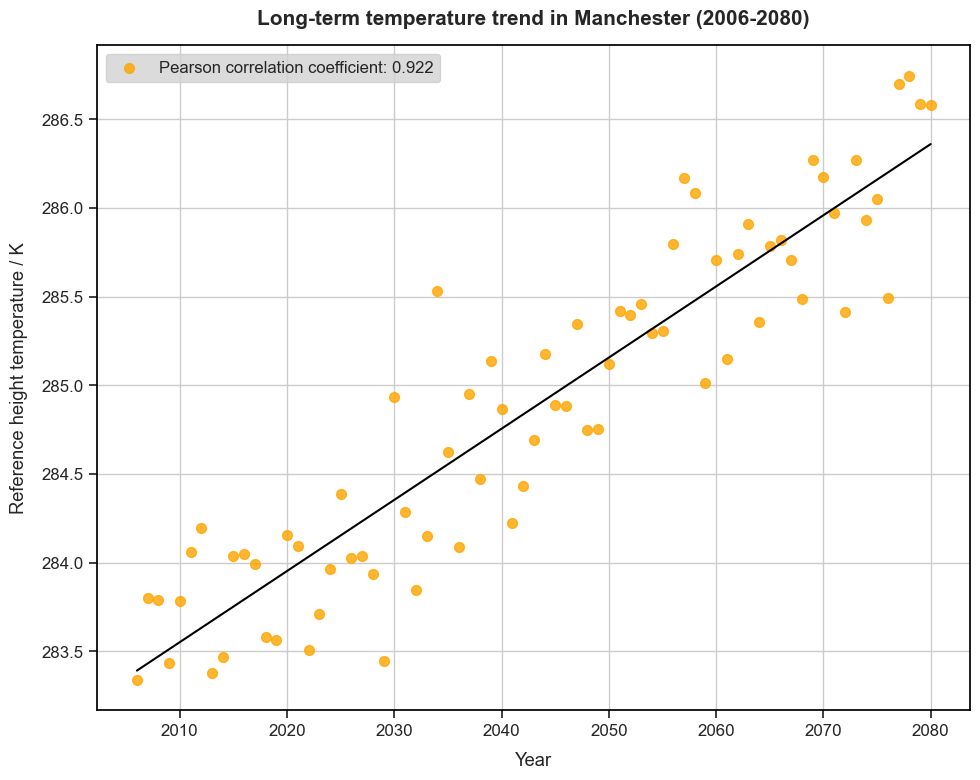

In [315]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)

temp_year_p_corr = annual_df['TREFHT'].corr(annual_df['year'])

plt.figure(figsize=(10,8))
sns.regplot(x='year', y='TREFHT', data=annual_df, color='k',
            ci=None, line_kws={'linewidth':1.5},
            label=f"Pearson correlation coefficient: {temp_year_p_corr:.3f}",
            scatter_kws={'color':'orange', 's':50}
           )
plt.xlabel('Year', labelpad=10)
plt.ylabel(meta_df.loc[meta_df['Column']=='TREFHT', 'Meaning'].values[0], labelpad=10)
plt.legend(loc='upper left', frameon=True, fontsize=12, facecolor='lightgray', framealpha=0.8)
plt.title('Long-term temperature trend in Manchester (2006-2080)', fontweight='bold', fontsize=15, pad=15)
for spine in plt.gca().spines.values():
    spine.set_color('k')
plt.tight_layout()
plt.savefig('temp_year_scatter.png', dpi=300, bbox_inches='tight')
plt.draw()
plt.show()

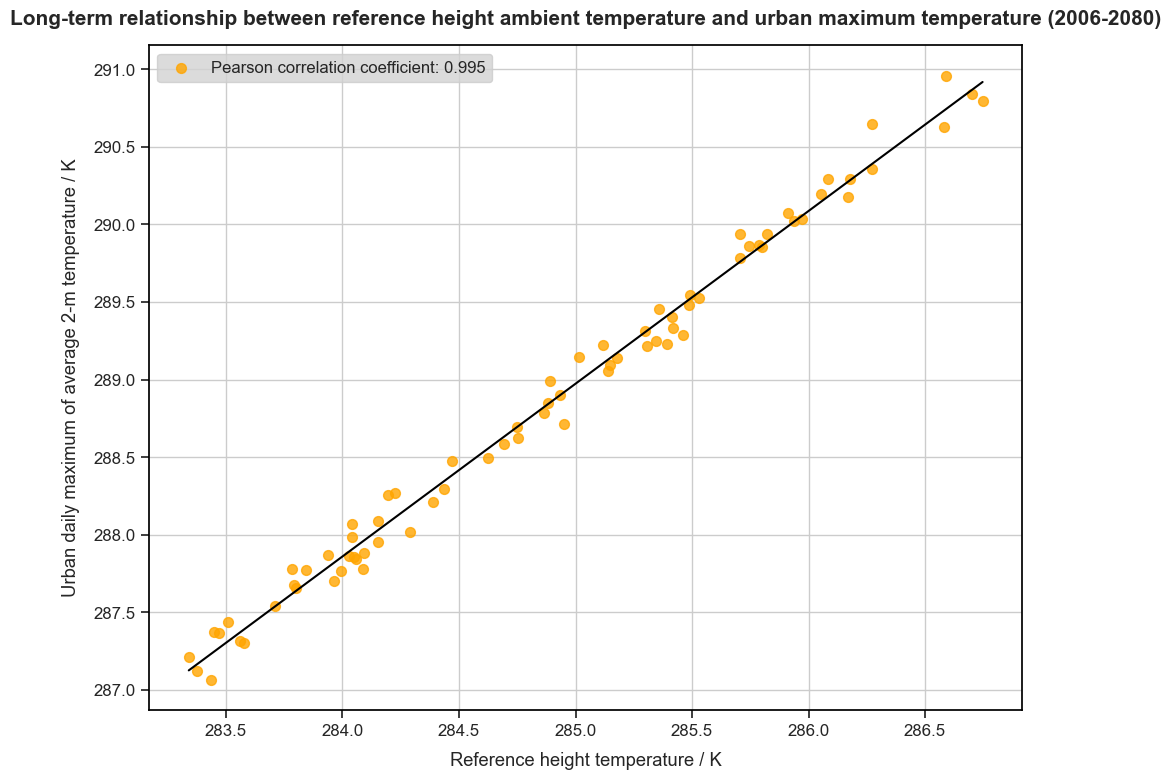

In [316]:
plt.figure(figsize=(10,8))

temp_urb_p_corr = annual_df['TREFHT'].corr(annual_df['TREFMXAV_U'])

sns.regplot(x='TREFHT', y='TREFMXAV_U', data=annual_df, color='k',
            ci=None, line_kws={'linewidth':1.5},
            label=f"Pearson correlation coefficient: {temp_urb_p_corr:.3f}",
            scatter_kws={'color':'orange', 's':50}
           )
plt.xlabel(meta_df.loc[meta_df['Column']=='TREFHT', 'Meaning'].values[0], labelpad=10)
plt.ylabel(meta_df.loc[meta_df['Column']=='TREFMXAV_U', 'Meaning'].values[0], labelpad=10)
plt.legend(loc='upper left', frameon=True, fontsize=12, facecolor='lightgray', framealpha=0.8)
plt.title('Long-term relationship between reference height ambient temperature and urban maximum temperature (2006-2080)', fontweight='bold', fontsize=15, pad=15)
for spine in plt.gca().spines.values():
    spine.set_color('k')
plt.tight_layout()
plt.savefig('urbtemp_temp_scatter.png', dpi=300, bbox_inches='tight')
plt.draw()
plt.show()

WMO stipulate that a 30 year period constitues the 'climate' at a location

In [317]:
baseline_mask = (df['year'] >= 2006) & (df['year'] <= 2035)
future_mask = (df['year'] >= 2051) & (df['year'] <= 2080)

baseline_data = df[baseline_mask]

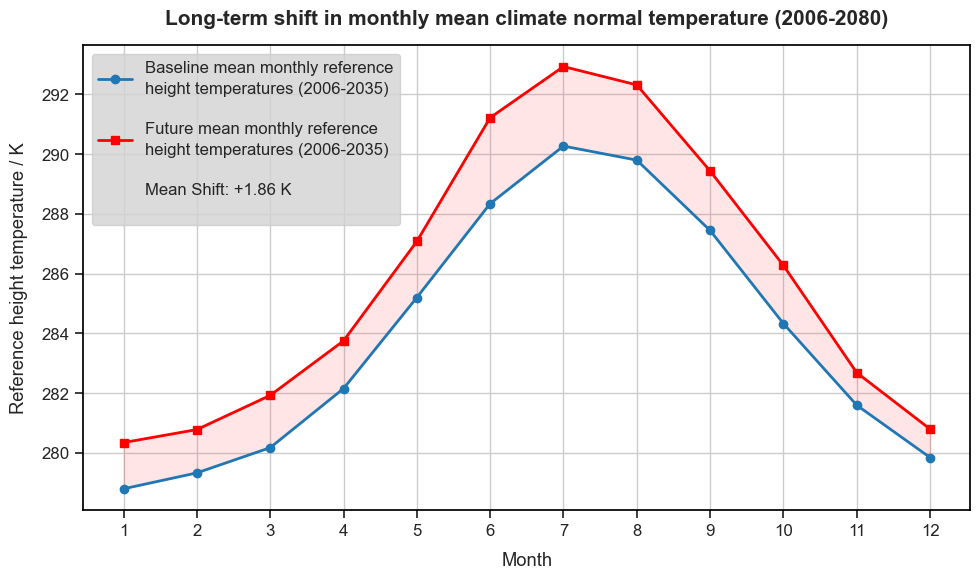

In [318]:
# Reference height temp

baseline_montly_mean_temp = df[baseline_mask].groupby('month')['TREFHT'].mean()
future_monthly_mean_temp = df[future_mask].groupby('month')['TREFHT'].mean()

# Calculate overall average temperature increase in degrees
delta_t = df[future_mask]['TREFHT'].mean() - df[baseline_mask]['TREFHT'].mean()

stats_label = (
    f"Mean Shift: +{delta_t:.2f} K\n"
)

plt.figure(figsize=(10, 6))

plt.plot(baseline_montly_mean_temp.index,
         baseline_montly_mean_temp.values, 'o-',
         label='Baseline mean monthly reference\nheight temperatures (2006-2035)', lw=2
        )
plt.plot(future_monthly_mean_temp.index,
         future_monthly_mean_temp.values, 's-',
         label='Future mean monthly reference\nheight temperatures (2006-2035)', color='red', lw=2)
plt.fill_between(baseline_montly_mean_temp.index, baseline_montly_mean_temp.values, future_monthly_mean_temp.values, color='red', alpha=0.1)

plt.plot([], [], ' ', label=stats_label.replace(', ', ',\n')) 

plt.title('Long-term shift in monthly mean climate normal temperature (2006-2080)', fontweight='bold', fontsize=15, pad=15)
plt.xlabel('Month', labelpad=10)
plt.ylabel(meta_df.loc[meta_df['Column']=='TREFHT', 'Meaning'].values[0], labelpad=10)
plt.xticks(range(1, 13))
legend = plt.legend(loc='upper left', frameon=True, fontsize=12, facecolor='lightgray', framealpha=0.8, labelspacing=1.5)
for text in legend.get_texts():
    text.set_linespacing(1.5)
for spine in plt.gca().spines.values():
    spine.set_color('k')
plt.tight_layout()
plt.savefig('temp_base_vs_future_line.png', dpi=300, bbox_inches='tight')
plt.draw()
plt.show()

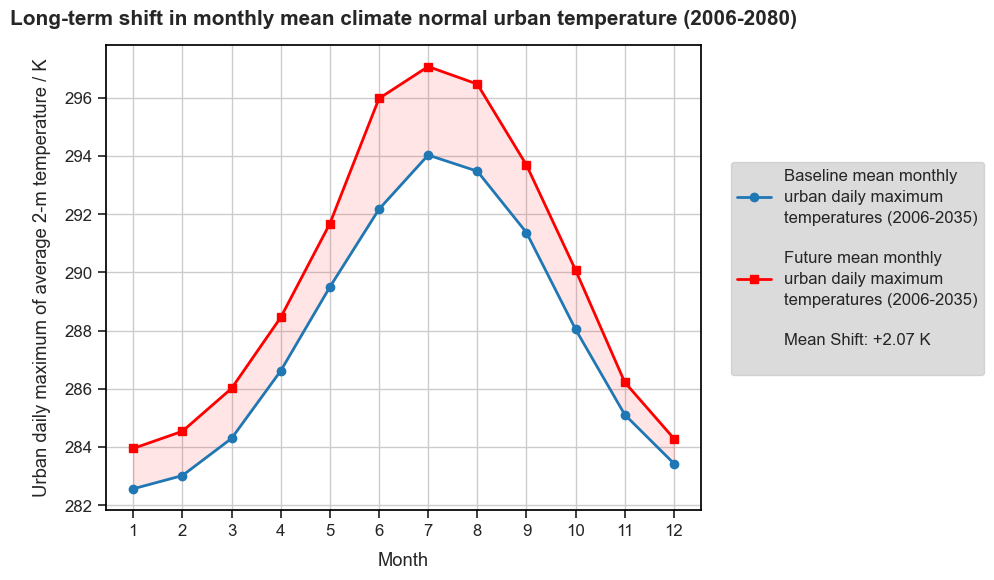

In [319]:
# Same for urban daily max temp

baseline_montly_mean_urb_temp = df[baseline_mask].groupby('month')['TREFMXAV_U'].mean()
future_monthly_mean_urb_temp = df[future_mask].groupby('month')['TREFMXAV_U'].mean()

# Calculate overall average temperature increase in degrees
delta_t = df[future_mask]['TREFMXAV_U'].mean() - df[baseline_mask]['TREFMXAV_U'].mean()

stats_label = (
    f"Mean Shift: +{delta_t:.2f} K\n"
)

plt.figure(figsize=(10, 6))

plt.plot(baseline_montly_mean_urb_temp.index,
         baseline_montly_mean_urb_temp.values, 'o-',
         label='Baseline mean monthly\nurban daily maximum\ntemperatures (2006-2035)', lw=2
        )
plt.plot(future_monthly_mean_urb_temp.index,
         future_monthly_mean_urb_temp.values, 's-',
         label='Future mean monthly\nurban daily maximum\ntemperatures (2006-2035)', color='red', lw=2)
plt.fill_between(baseline_montly_mean_urb_temp.index, baseline_montly_mean_urb_temp.values, future_monthly_mean_urb_temp.values, color='red', alpha=0.1)

plt.plot([], [], ' ', label=stats_label.replace(', ', ',\n')) 

plt.title('Long-term shift in monthly mean climate normal urban temperature (2006-2080)', fontweight='bold', fontsize=15, pad=15)
plt.xlabel('Month', labelpad=10)
plt.ylabel(meta_df.loc[meta_df['Column']=='TREFMXAV_U', 'Meaning'].values[0], labelpad=10)
plt.xticks(range(1, 13))
legend = plt.legend(loc='upper left', frameon=True, fontsize=12,
                    facecolor='lightgray', framealpha=0.8,
                    labelspacing=1.5, bbox_to_anchor=(1.05, 0.75),
                    borderaxespad=0
                   )
for text in legend.get_texts():
    text.set_linespacing(1.5)
for spine in plt.gca().spines.values():
    spine.set_color('k')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('urbtemp_base_vs_future_line.png', dpi=300, bbox_inches='tight')
plt.draw()
plt.show()

Split data into 15 year 'blocks' to explore shifts over the century

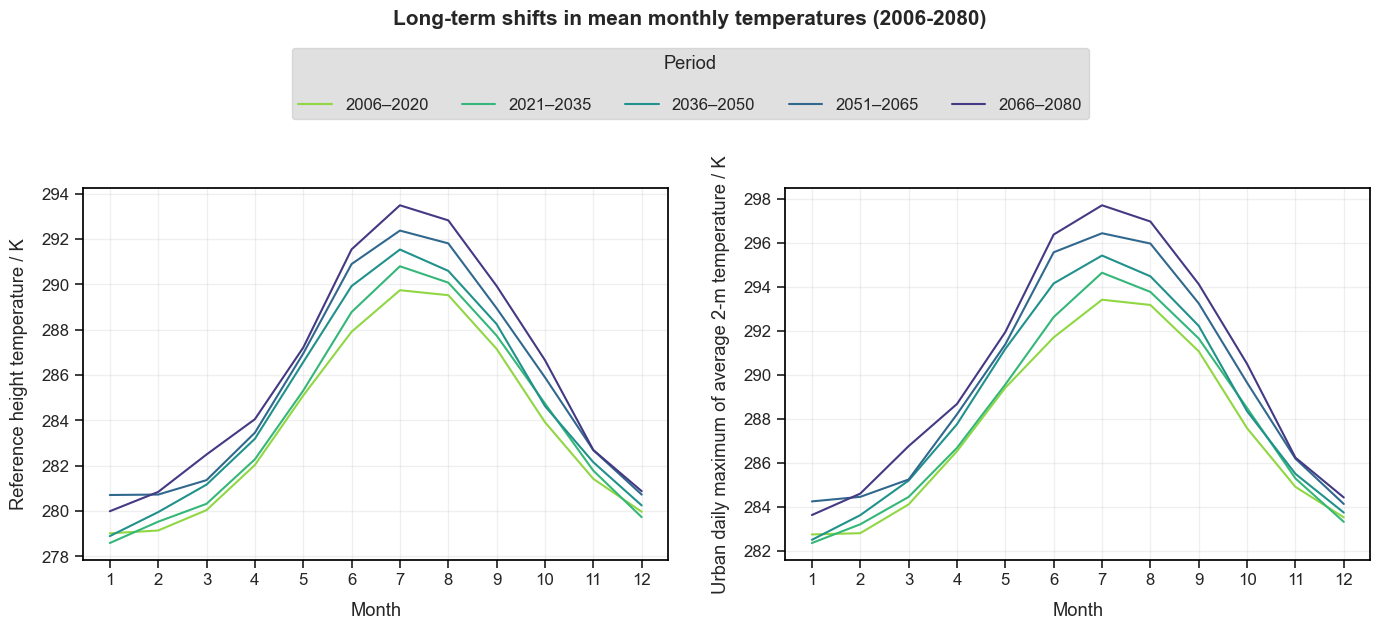

In [320]:
df['block'] = ((df['year'] - 2006) // 15) * 15 + 2006

means_vars = ['TREFHT', 'TREFMXAV_U']

monthly_means = (
    df.groupby(['block', 'month'])[means_vars]
    .mean()
    .reset_index()
)

block_ranges = df.groupby("block")["year"].agg(min_year="min", max_year="max").sort_values("min_year")
label_map = {b: f"{r.min_year}\u2013{r.max_year}" for b, r in block_ranges.iterrows()}

monthly_means = monthly_means.copy()
monthly_means["block_label"] = monthly_means["block"].map(label_map)

hue_order = [label_map[b] for b in block_ranges.index]

n = len(hue_order)

# Light to dark as time progresses
pal = sns.color_palette("viridis", n_colors=n)[::-1]
palette = dict(zip(hue_order, pal))

unit_map = {
    "TREFHT": r"K",
    "TREFMXAV_U": r"K",
}

n_rows, n_cols = 1, 2
vars_to_plot = monthly_means.columns[2:-1].tolist()

total_subplots = n_rows * n_cols
if total_subplots < len(vars_to_plot):
    n_rows = (len(vars_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6), sharex=True)
axes = axes.ravel()

handles = labels = None

for i, (ax, var) in enumerate(zip(axes, vars_to_plot)):
    show_leg = (i == 0)

    sns.lineplot(
        data=monthly_means,
        x="month",
        y=var,
        hue="block_label",
        hue_order=hue_order,
        palette=palette,
        ax=ax,
        legend=show_leg
    )

    # unit = unit_map.get(var, "")
    # ylabel = f"{var} ({unit})" if unit else var
    ylabel = meta_df.loc[meta_df['Column']==var, 'Meaning'].values[0]

    ax.set_xlabel("Month", labelpad=10)
    ax.set_ylabel(ylabel, labelpad=10)
    ax.set_xticks(range(1, 13))
    ax.grid(True, alpha=0.3)

    if show_leg and ax.legend_ is not None:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend_.remove()

# delete unused axes
for j in range(len(vars_to_plot), len(axes)):
    fig.delaxes(axes[j])

for ax in axes[:len(vars_to_plot)]:
    for spine in ax.spines.values():
        spine.set_color("black")

# shared legend
if labels:
    fig.legend(
        handles, labels,
        title="Period",
        loc="upper center",
        bbox_to_anchor=(0.5, 1),
        ncol=min(len(labels), 5),
        frameon=True,
        fontsize=12,
        facecolor='lightgray',
        framealpha=0.7,
        labelspacing=1.5
    )

fig.suptitle('Long-term shifts in mean monthly temperatures (2006-2080)', fontweight='bold', fontsize=15, y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.subplots_adjust(wspace=0.2)
plt.savefig('temps_shifts_line.png', dpi=300, bbox_inches='tight')
plt.draw()
plt.show()

### UHI index trend

Examine trend in UHI index over the century

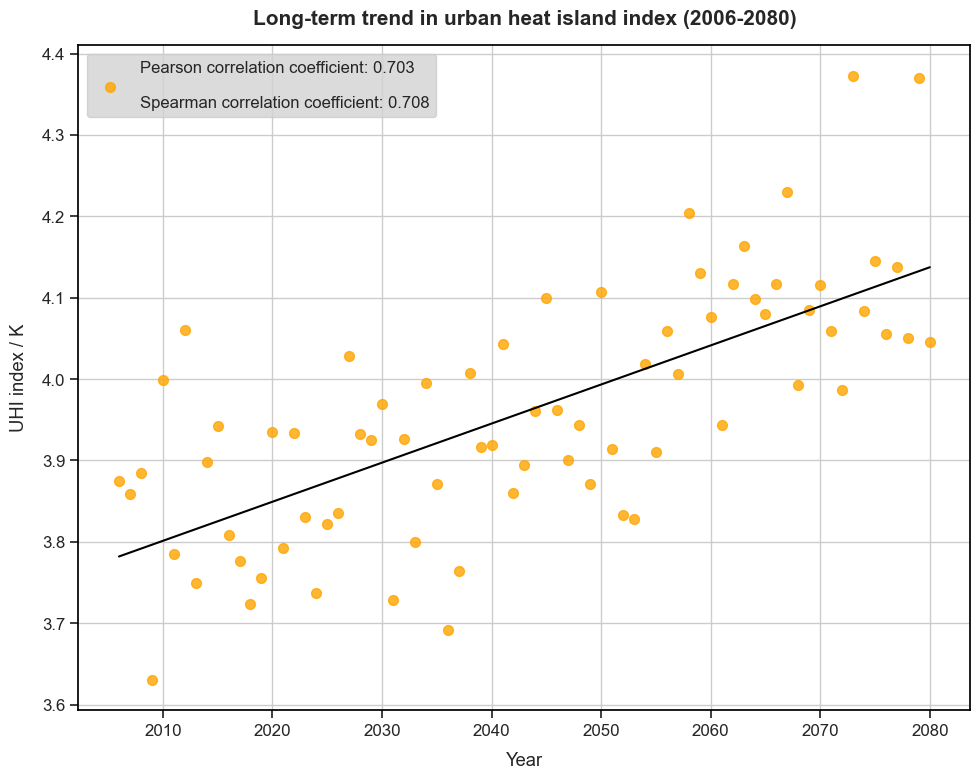

In [321]:
# Urban heat island
df['UHI_Index'] = df['TREFMXAV_U'] - df['TREFHT']

annual_df = df.copy().drop(['month', 'day'], axis=1).groupby('year')['UHI_Index'].mean().reset_index()

plt.figure(figsize=(10,8))

uhi_year_p_corr = annual_df['UHI_Index'].corr(annual_df['year'])
uhi_year_s_corr = annual_df['UHI_Index'].corr(annual_df['year'], method='spearman')

labels = (
    f"Pearson correlation coefficient: {uhi_year_p_corr:.3f}\n\n"
    f"Spearman correlation coefficient: {uhi_year_s_corr:.3f}"
)

sns.regplot(x='year', y='UHI_Index', data=annual_df, color='k',
            ci=None, line_kws={'linewidth':1.5},
            label=labels,
            scatter_kws={'color':'orange', 's':50}
           )
plt.xlabel('Year', labelpad=10)
plt.ylabel('UHI index / K', labelpad=10)
plt.legend(loc='upper left', frameon=True, fontsize=12, facecolor='lightgray', framealpha=0.8)
plt.title('Long-term trend in urban heat island index (2006-2080)', fontweight='bold', fontsize=15, pad=15)
for spine in plt.gca().spines.values():
    spine.set_color('k')
plt.tight_layout()
plt.savefig('uhi_year_scatter.png', dpi=300, bbox_inches='tight')
plt.draw()
plt.show()

### Extreme weather events: temperature, precipitation, compound

Explore how the frequency of extreme weather events changes over the century

In [322]:
temp_thresh = baseline_data['TREFMXAV_U'].quantile(0.90)
precip_thresh = baseline_data['PRECT'].quantile(0.95)

df['is_extreme_temp'] = df['TREFMXAV_U'] > temp_thresh
df['is_extreme_precip'] = df['PRECT'] > precip_thresh
df['is_extreme_both'] = df['is_extreme_temp'] & df['is_extreme_precip']

extreme_freq = (
    df.groupby("block")[["is_extreme_temp",
                         "is_extreme_precip",
                         "is_extreme_both"]]
    .sum()
    .div(15)
    .reset_index()
)

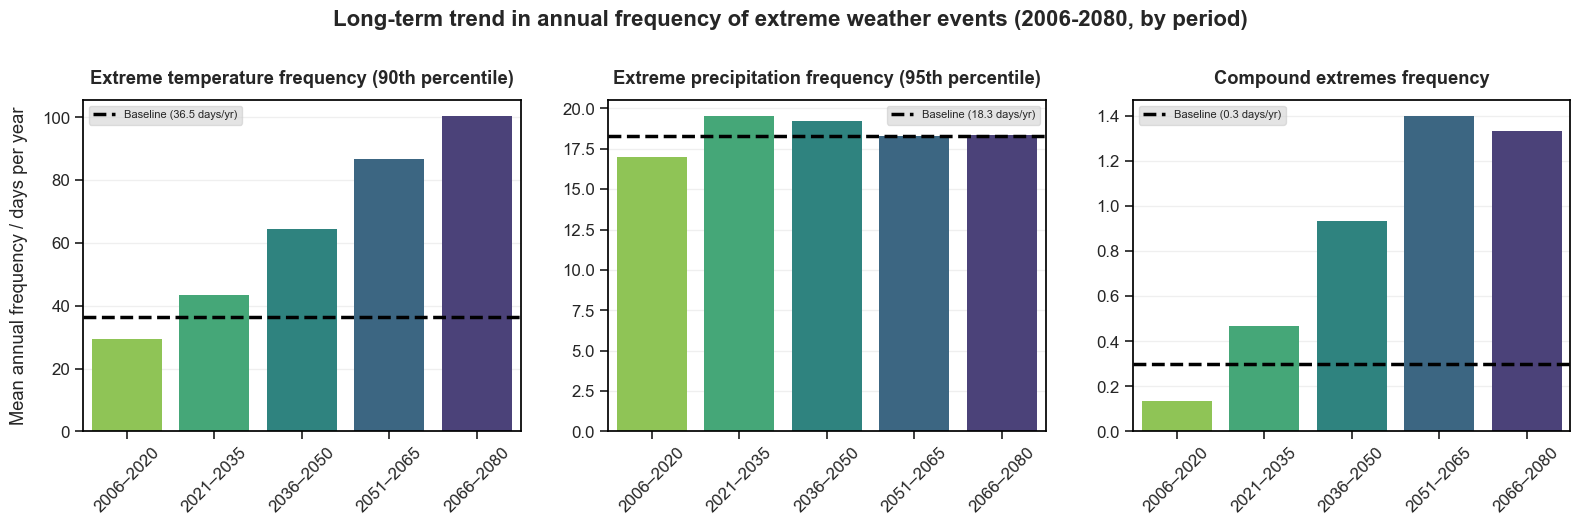

In [323]:
extreme_freq["block_label"] = extreme_freq["block"].map(label_map)
extreme_freq = extreme_freq.sort_values("block")

x_order = [label_map[b] for b in block_ranges.index]

n = len(x_order)

pal = sns.color_palette("viridis", n_colors=n)[::-1]
palette = dict(zip(x_order, pal))

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

vars_to_plot = [
    "is_extreme_temp",
    "is_extreme_precip",
    "is_extreme_both"
]

titles = [
    "Extreme temperature frequency (90th percentile)",
    "Extreme precipitation frequency (95th percentile)",
    "Compound extremes frequency"
]

for ax, var, title in zip(axes, vars_to_plot, titles):

    sns.barplot(
        data=extreme_freq,
        x="block_label",
        y=var,
        order=x_order,
        palette=palette,
        ax=ax,
        hue="block_label",
        legend=False
    )

    ax.set_title(title, pad=12, fontweight='bold')
    ax.set_xlabel("")
    ax.tick_params(axis="x", rotation=45)
    ax.grid(axis="y", alpha=0.3)

    baseline_val = df[baseline_mask][var].sum()/30
    ax.axhline(
        y=baseline_val,
        color='k',
        linestyle='--',
        linewidth=2.5,
        label=f'Baseline ({baseline_val:.1f} days/yr)'
    )

    ax.legend(
        loc="best",
        frameon=True,
        facecolor="lightgrey",
        framealpha=0.6,
        fontsize=8
    )

    for spine in ax.spines.values():
        spine.set_color("black")

axes[0].set_ylabel("Mean annual frequency / days per year", labelpad=10)

for ax in axes[1:]:
    ax.set_ylabel("")

fig.suptitle("Long-term trend in annual frequency of extreme weather events (2006-2080, by period)",
             fontsize=16,
             y=1.05,
             fontweight='bold'
            )

plt.tight_layout(rect=[0, 0, 1, 1.05])
plt.subplots_adjust(wspace=0.2)
plt.savefig('extreme_bars.png', dpi=300, bbox_inches='tight')
plt.draw()
plt.show()